# Ejercicio 6

Blanca Cecilia Ubaque - 201725992

María Carolina Trespalacios – 200313688

# Exercise 06
# TensorFlow and Keras


---

In [26]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

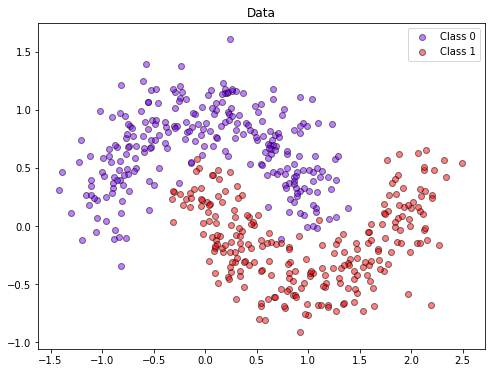

In [27]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

## Solución

In [28]:
#Se debe agregar una capa, para que sea NO LINEAL

* Una visualización del CG del modelo.

In [29]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Helper functions to inline visualization of computing graphs
# Extracted from: 

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

Una visualización de la región de decisión y con los datos de prueba

In [30]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
    #DATOS ENTRADA:
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
   
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
   
    
    #MODELO INFERENCIA 
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )

    #FUNCION DE PERDIDA (SIGMOIDE)
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
    #FUNCION ENTRENAMIENTO
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

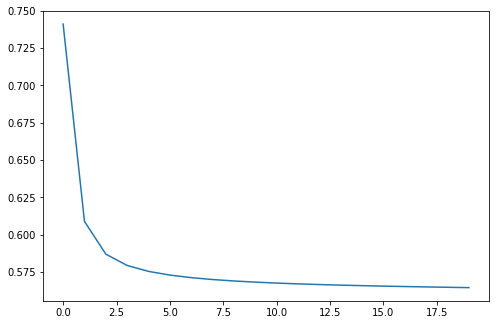

In [31]:
num_epochs = 1000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

In [32]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

[[-0.16319647 -0.42560798]
 [-0.978973    2.0620077 ]
 [ 0.60261536 -0.43517888]
 [-1.5342306   2.5782902 ]
 [ 1.1207153  -3.8342726 ]
 [ 0.9527104  -1.7749366 ]
 [-0.46985674 -1.1303118 ]
 [-0.14437927 -0.6138434 ]
 [ 0.8787473  -2.9927077 ]
 [ 0.5948074   3.9087234 ]]
[[0.00025556]]


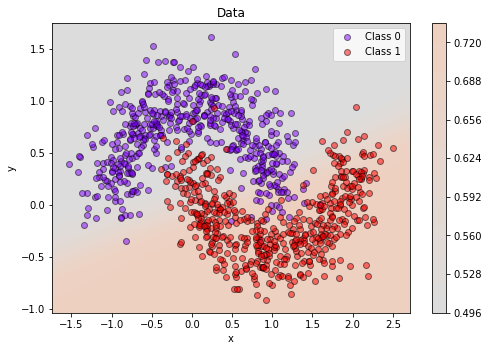

In [33]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


## Diferentes funciones de activación para la capa oculta 

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

In [79]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Loading data...
8982 train sequences
2246 test sequences
46 classes


In [80]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


In [81]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


In [82]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [83]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [84]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_13 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_13 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_14 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_14 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [85]:
from keras.optimizers import SGD

In [86]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [87]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 214us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 1s 177us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 1s 180us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 1s 178us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 1s 177us/step - loss: 1.9276 - acc: 0.5163 - val_loss: 1.9608 - val_acc: 0.5150


In [88]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 64us/step
Test score: 1.9264665792164586
Test accuracy: 0.5258236865804117


## Diferentes funciones de activación para la capa oculta 

In [89]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()

## Usando Relu y Softmax  - Prueba 1(https://keras.io/activations/)

In [90]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_15 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_15 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_16 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_16 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [91]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [92]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 202us/step - loss: 2.4320 - acc: 0.4618 - val_loss: 1.9414 - val_acc: 0.5206
Epoch 2/5
8083/8083 [==============================] - 1s 179us/step - loss: 1.7548 - acc: 0.5732 - val_loss: 1.7167 - val_acc: 0.6007
Epoch 3/5
8083/8083 [==============================] - 1s 177us/step - loss: 1.5788 - acc: 0.6295 - val_loss: 1.5980 - val_acc: 0.6429
Epoch 4/5
8083/8083 [==============================] - 1s 179us/step - loss: 1.4626 - acc: 0.6660 - val_loss: 1.5149 - val_acc: 0.6774
Epoch 5/5
8083/8083 [==============================] - 1s 174us/step - loss: 1.3728 - acc: 0.6915 - val_loss: 1.4543 - val_acc: 0.6885


## Performance del Modelo 1

In [93]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 64us/step
Test score: 1.4348816238973996
Test accuracy: 0.6758682101779183


### Usando diferentes Optimizadores Prueba 2(https://keras.io/optimizers/)

In [94]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()

In [95]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_17 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_17 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_18 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_18 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [96]:
from keras.optimizers import Adadelta

model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

### Se utiliza un Split del 30%

In [97]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/5
6287/6287 [==============================] - 2s 394us/step - loss: 1.4828 - acc: 0.6712 - val_loss: 1.0703 - val_acc: 0.7614
Epoch 2/5
6287/6287 [==============================] - 2s 351us/step - loss: 0.8472 - acc: 0.8085 - val_loss: 0.9463 - val_acc: 0.7870
Epoch 3/5
6287/6287 [==============================] - 2s 357us/step - loss: 0.6120 - acc: 0.8619 - val_loss: 0.8730 - val_acc: 0.7922
Epoch 4/5
6287/6287 [==============================] - 2s 343us/step - loss: 0.4666 - acc: 0.8923 - val_loss: 0.8583 - val_acc: 0.8052
Epoch 5/5
6287/6287 [==============================] - 2s 350us/step - loss: 0.3710 - acc: 0.9138 - val_loss: 0.8608 - val_acc: 0.8000


## Performance del Modelo 2

In [99]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 64us/step
Test score: 0.9196064051834474
Test accuracy: 0.7876224398931434


## Agregue la deserción entre la capa oculta y la capa de salida Prueba3 (https://keras.io/layers/core/#dropout)

In [100]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()

## DropOut del 40%

In [101]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_19 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_19 (Activation)     (None, 256)                 0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_20 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_20 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [102]:
### OPTIMIZADOR

from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

### Se utiliza un Split del 50%

In [108]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.5)

Train on 4491 samples, validate on 4491 samples
Epoch 1/5
4491/4491 [==============================] - 1s 227us/step - loss: 1.1701 - acc: 0.7270 - val_loss: 1.1812 - val_acc: 0.7352
Epoch 2/5
4491/4491 [==============================] - 1s 235us/step - loss: 1.1567 - acc: 0.7319 - val_loss: 1.1671 - val_acc: 0.7393
Epoch 3/5
4491/4491 [==============================] - 1s 226us/step - loss: 1.1264 - acc: 0.7393 - val_loss: 1.1597 - val_acc: 0.7393
Epoch 4/5
4491/4491 [==============================] - 1s 230us/step - loss: 1.1135 - acc: 0.7448 - val_loss: 1.1456 - val_acc: 0.7470
Epoch 5/5
4491/4491 [==============================] - 1s 226us/step - loss: 1.0873 - acc: 0.7524 - val_loss: 1.1351 - val_acc: 0.7499


## Performance del Modelo 3

In [109]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 66us/step
Test score: 1.2255582603512336
Test accuracy: 0.7177203918341962


## Diferentes inicializadores para las capas densas Prueba 4 (https://keras.io/initializers/)

In [121]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()

In [129]:
#Initializer used (random_uniform)

model = Sequential()
model.add(Dense(256, input_shape=(max_words,)  ,kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_25 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_25 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_26 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_26 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [130]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [132]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/5
6287/6287 [==============================] - 1s 191us/step - loss: 1.3274 - acc: 0.7048 - val_loss: 1.2862 - val_acc: 0.7165
Epoch 2/5
6287/6287 [==============================] - 1s 189us/step - loss: 1.2742 - acc: 0.7161 - val_loss: 1.2507 - val_acc: 0.7224
Epoch 3/5
6287/6287 [==============================] - 1s 191us/step - loss: 1.2270 - acc: 0.7274 - val_loss: 1.2186 - val_acc: 0.7317
Epoch 4/5
6287/6287 [==============================] - 1s 190us/step - loss: 1.1854 - acc: 0.7376 - val_loss: 1.1900 - val_acc: 0.7406
Epoch 5/5
6287/6287 [==============================] - 1s 188us/step - loss: 1.1478 - acc: 0.7449 - val_loss: 1.1674 - val_acc: 0.7492


## Performance del Modelo 4

In [133]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 64us/step
Test score: 1.2699347319394907
Test accuracy: 0.7172751558591294


### Conclusión de los 4 Modelos

El mejor Accuracy (0.7876224398931434) se logra con la combinación de Activation('relu') y Activation('softmax') y un optimizador (Adadelta optimizer), un split de 0.3 y con 5 epochs.